In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.io import imread, imsave
from skimage.color import rgb2lab, lab2rgb
from pathlib import Path

from src.preprocess import FragmentPreprocessor

Detectron v2 is not installed


In [2]:
%matplotlib inline

In [3]:
# model = load_model()
preprocessor = FragmentPreprocessor()

In [4]:
data_dir = '../../voronoi/example'
palette = np.array([[4.83058360e+01, -4.28336049e+00, -1.04226657e+00],
                    [7.28763389e+01,  1.10190913e+01,  2.91083397e+01],
                    [1.93975643e+01,  8.21757008e+00, -6.52862709e+00],
                    [6.12470461e+01,  6.38868771e+00,  1.05191202e+01],
                    [8.70237508e+01,  2.60029629e+00,  6.34060233e+00],
                    [3.84328672e+01,  2.22768163e+01,  1.17465682e+00],
                    [3.29131583e+01,  3.06846260e-02, -6.19825618e+00]])

In [9]:
frag, extended_frag, mask, extended_mask = preprocessor.read_fragment(data_dir, 7)

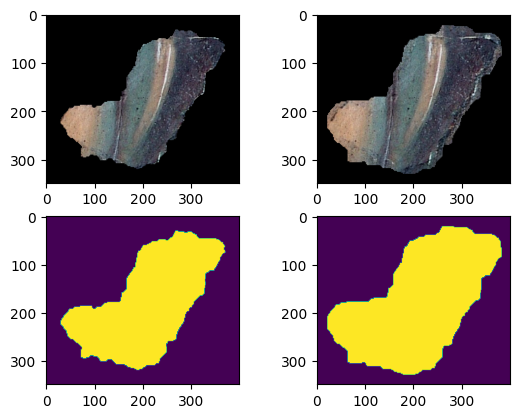

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].imshow(frag)
axes[0, 1].imshow(extended_frag)
axes[1, 0].imshow(mask[:, :, 0])
axes[1, 1].imshow(extended_mask[:, :, 0])

In [13]:
color_dsc = preprocessor.compute_color_dsc(frag, mask, palette)

<BarContainer object of 8 artists>

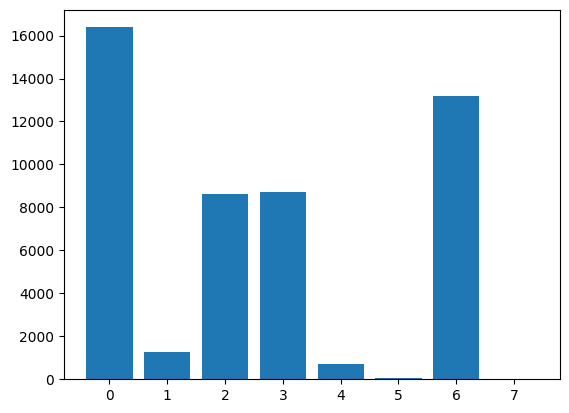

In [14]:
plt.bar(range(len(color_dsc.h)), color_dsc.h)

In [17]:
preprocessor.convert_fragment_to_data_structure(data_dir, 14, "../../test_dataset", palette)

/mnt/c/Users/dev/Documents/fresco/fresco-reassembling/code/src/preprocess.py:129: UserWarning: /mnt/c/Users/dev/Documents/fresco/test_dataset/14/mask.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  imsave(p / 'mask.png', mask)
/mnt/c/Users/dev/Documents/fresco/fresco-reassembling/code/src/preprocess.py:130: UserWarning: /mnt/c/Users/dev/Documents/fresco/test_dataset/14/extended_mask.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  imsave(p / 'extended_mask.png', extended_mask)


In [18]:
from tqdm import tqdm

In [21]:
for i in tqdm(range(0, 4)):
    try: 
        preprocessor.convert_fragment_to_data_structure(data_dir, i, "../../test_dataset", palette)
    except FileNotFoundError:
        print(f'File not found {i}')

 25%|█████████████████████▎                                                               | 1/4 [00:00<00:00,  3.26it/s]

File not found 0


/mnt/c/Users/dev/Documents/fresco/fresco-reassembling/code/src/preprocess.py:129: UserWarning: /mnt/c/Users/dev/Documents/fresco/test_dataset/1/mask.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  imsave(p / 'mask.png', mask)
/mnt/c/Users/dev/Documents/fresco/fresco-reassembling/code/src/preprocess.py:130: UserWarning: /mnt/c/Users/dev/Documents/fresco/test_dataset/1/extended_mask.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  imsave(p / 'extended_mask.png', extended_mask)
 50%|██████████████████████████████████████████▌                                          | 2/4 [00:04<00:04,  2.39s/it]WARNING:imageio:Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/mnt/c/Users/dev/Documents/fresco/fresco-reassembling/code/src/preprocess.py:129: UserWarning: /mn

In [22]:
edge_1d, cedge_1d, cedge_2d = preprocessor.get_colorized_edge(extended_frag, mask, palette)

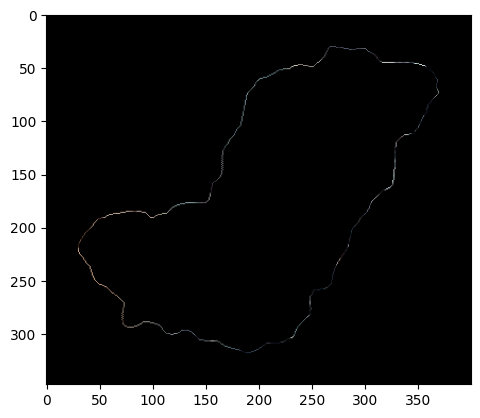

In [23]:
plt.imshow(cedge_2d)